# Заняття 2

## Мета
Реалізувати базову нейронну мережу, яка зможе класифікувати рукописні цифри з набору даних MNIST, використовуючи одну з двох бібліотек: TensorFlow або PyTorch.

## Кроки для виконання завдання

### 1. Підготовка середовища
- Встановіть необхідні бібліотеки: TensorFlow або PyTorch, numpy, matplotlib (для візуалізації).

### 2. Завантаження та попередня обробка даних
- Завантажте набір даних MNIST. Він містить 60,000 зображень для навчання та 10,000 зображень для тестування.
- Нормалізуйте значення пікселів до діапазону [0, 1].
- Розділіть дані на навчальну та тестову вибірки.

### 3. Створення архітектури нейронної мережі
- Визначте базову нейронну мережу з використанням кількох шарів:
  - Вхідний шар: 28x28 (784) нейронів.
  - Один або два прихованих шари з активуючою функцією ReLU.
  - Вихідний шар з 10 нейронами (відповідають 10 цифрам), з функцією активації softmax.

### 4. Налаштування параметрів навчання
- Визначте функцію втрат, наприклад, cross-entropy loss.
- Виберіть оптимізатор, наприклад, SGD або Adam.
- Визначте кількість епох для навчання та розмір батчу.

### 5. Навчання моделі
- Запустіть процес навчання моделі на навчальній вибірці.
- Періодично обчислюйте втрати та точність на тестовій вибірці для оцінки процесу навчання.

### 6. Оцінка моделі
- Після навчання моделі обчисліть її точність на тестовому наборі даних.
- Побудуйте матрицю невідповідностей для детальнішого аналізу результатів.

### 7. Візуалізація результатів
- Виберіть кілька зображень із тестової вибірки та візуалізуйте їх з відповідними передбаченнями моделі.
- Побудуйте графік втрат та точності під час навчання.

## Мінімальні вимоги
- Реалізувати нейронну мережу використовуючи одну з бібліотек (TensorFlow або PyTorch).
- Досягти точності класифікації на тестовій вибірці щонайменше 90%.
- Зробити базову візуалізацію результатів.

## Додаткові рекомендації
- Експериментуйте з кількістю шарів та нейронів, щоб покращити точність моделі.
- Використовуйте GPU, якщо можливо, для пришвидшення навчання.

## Формат виконання
- `.ipynb` блокнот з кодом та візуалізацією, або ж код в `.py` з прикріпленими зображеннями результатів на GitHub.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


class BaseNeuralNet(nn.Module):
    def __init__(self):
        super(BaseNeuralNet, self).__init__()

    def start_learning(self, epochs=10, lr=0.001):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), lr=lr)

        train_losses, test_losses = [], []

        for epoch in range(epochs):
            self.train()
            running_loss = 0.0

            for images, labels in train_loader:
                optimizer.zero_grad()
                outputs = self(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            train_losses.append(running_loss / len(train_loader))

            self.eval()
            test_loss = 0.0
            correct = 0

            with torch.no_grad():
                for images, labels in test_loader:
                    outputs = self(images)
                    loss = criterion(outputs, labels)
                    test_loss += loss.item()

                    _, predicted = torch.max(outputs, 1)
                    correct += (predicted == labels).sum().item()

            test_losses.append(test_loss / len(test_loader))
            accuracy = correct / len(test_dataset)

            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.4f}")

        plt.plot(train_losses, label='Train Loss')
        plt.plot(test_losses, label='Test Loss')
        plt.legend()
        plt.title('Train and Test Loss')
        plt.show()

        self.eval()
        examples = iter(test_loader)
        images, labels = next(examples)

        with torch.no_grad():
            outputs = self(images)
            _, predictions = torch.max(outputs, 1)

        fig, axes = plt.subplots(1, 5, figsize=(15, 4))
        for i in range(5):
            index = random.randint(0, len(images) - 1)
            axes[i].imshow(images[index].view(28, 28), cmap='gray')
            axes[i].set_title(f"True: {labels[index]}, Pred: {predictions[index]}")
            axes[i].axis('off')

        plt.show()


class NNOneLayer(BaseNeuralNet):
    def __init__(self):
        super(NNOneLayer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Перетворення 2D зображення в 1D
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x


class NNTwoLayers(BaseNeuralNet):
    def __init__(self):
        super(NNTwoLayers, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Перетворення 2D зображення в 1D
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x


### Варіант 1 (1 прихований шар)

#### 10 епох, lr=0.001

Epoch 1/10, Train Loss: 0.3841, Test Loss: 0.2399, Accuracy: 0.9309
Epoch 2/10, Train Loss: 0.1963, Test Loss: 0.1494, Accuracy: 0.9565
Epoch 3/10, Train Loss: 0.1427, Test Loss: 0.1296, Accuracy: 0.9609
Epoch 4/10, Train Loss: 0.1185, Test Loss: 0.1329, Accuracy: 0.9595
Epoch 5/10, Train Loss: 0.0984, Test Loss: 0.1011, Accuracy: 0.9687
Epoch 6/10, Train Loss: 0.0882, Test Loss: 0.1167, Accuracy: 0.9618
Epoch 7/10, Train Loss: 0.0774, Test Loss: 0.1017, Accuracy: 0.9694
Epoch 8/10, Train Loss: 0.0688, Test Loss: 0.0879, Accuracy: 0.9731
Epoch 9/10, Train Loss: 0.0646, Test Loss: 0.0861, Accuracy: 0.9741
Epoch 10/10, Train Loss: 0.0562, Test Loss: 0.1025, Accuracy: 0.9682


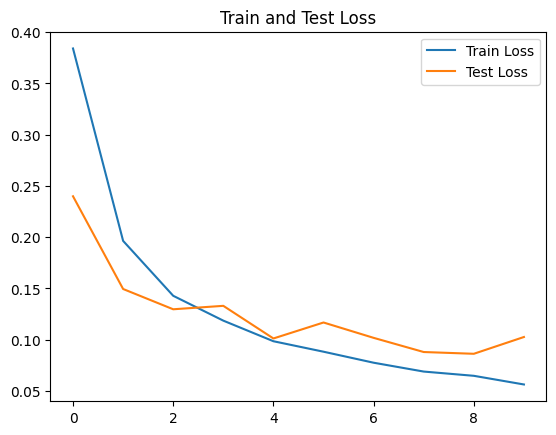

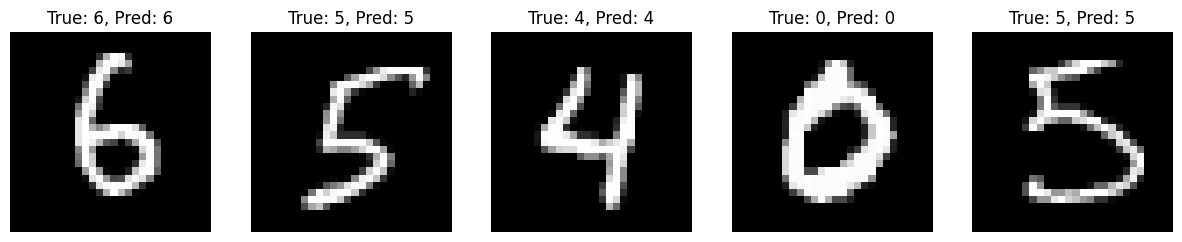

In [20]:
model = NNOneLayer()
model.start_learning(epochs=10, lr=0.001)

#### 20 епох, lr=0.001

Epoch 1/20, Train Loss: 0.3853, Test Loss: 0.2316, Accuracy: 0.9299
Epoch 2/20, Train Loss: 0.2045, Test Loss: 0.1585, Accuracy: 0.9550
Epoch 3/20, Train Loss: 0.1467, Test Loss: 0.1286, Accuracy: 0.9619
Epoch 4/20, Train Loss: 0.1158, Test Loss: 0.1328, Accuracy: 0.9615
Epoch 5/20, Train Loss: 0.0991, Test Loss: 0.1155, Accuracy: 0.9641
Epoch 6/20, Train Loss: 0.0878, Test Loss: 0.1227, Accuracy: 0.9605
Epoch 7/20, Train Loss: 0.0779, Test Loss: 0.0940, Accuracy: 0.9718
Epoch 8/20, Train Loss: 0.0713, Test Loss: 0.1047, Accuracy: 0.9695
Epoch 9/20, Train Loss: 0.0654, Test Loss: 0.1028, Accuracy: 0.9679
Epoch 10/20, Train Loss: 0.0588, Test Loss: 0.1043, Accuracy: 0.9693
Epoch 11/20, Train Loss: 0.0548, Test Loss: 0.0908, Accuracy: 0.9744
Epoch 12/20, Train Loss: 0.0500, Test Loss: 0.1095, Accuracy: 0.9704
Epoch 13/20, Train Loss: 0.0479, Test Loss: 0.1138, Accuracy: 0.9660
Epoch 14/20, Train Loss: 0.0439, Test Loss: 0.1008, Accuracy: 0.9718
Epoch 15/20, Train Loss: 0.0418, Test Loss:

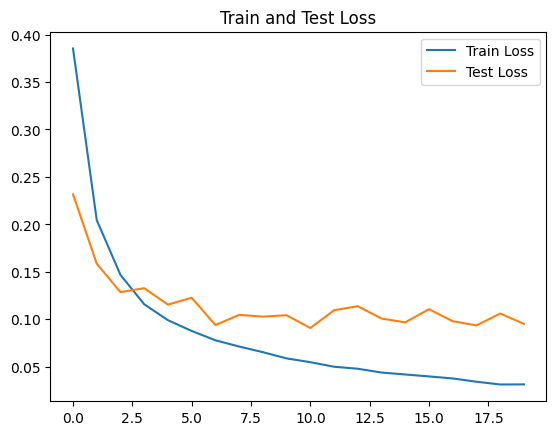

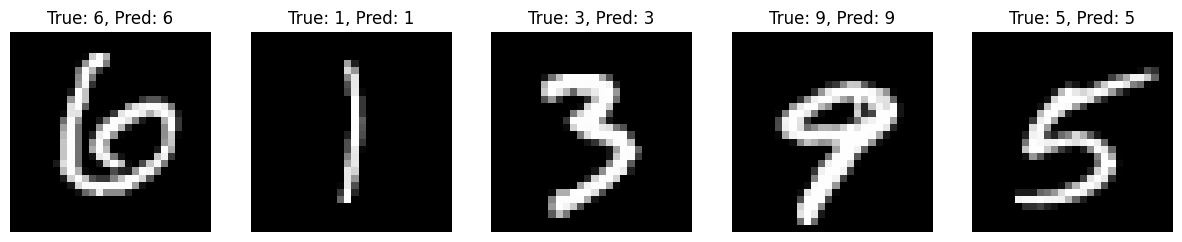

In [21]:
model = NNOneLayer()
model.start_learning(epochs=20, lr=0.001)

#### 10 епох, lr=0.0001

Epoch 1/10, Train Loss: 0.7486, Test Loss: 0.3794, Accuracy: 0.8970
Epoch 2/10, Train Loss: 0.3540, Test Loss: 0.3109, Accuracy: 0.9140
Epoch 3/10, Train Loss: 0.3048, Test Loss: 0.2757, Accuracy: 0.9220
Epoch 4/10, Train Loss: 0.2735, Test Loss: 0.2508, Accuracy: 0.9285
Epoch 5/10, Train Loss: 0.2477, Test Loss: 0.2306, Accuracy: 0.9342
Epoch 6/10, Train Loss: 0.2235, Test Loss: 0.2081, Accuracy: 0.9402
Epoch 7/10, Train Loss: 0.2037, Test Loss: 0.1915, Accuracy: 0.9442
Epoch 8/10, Train Loss: 0.1856, Test Loss: 0.1783, Accuracy: 0.9486
Epoch 9/10, Train Loss: 0.1702, Test Loss: 0.1651, Accuracy: 0.9503
Epoch 10/10, Train Loss: 0.1567, Test Loss: 0.1541, Accuracy: 0.9551


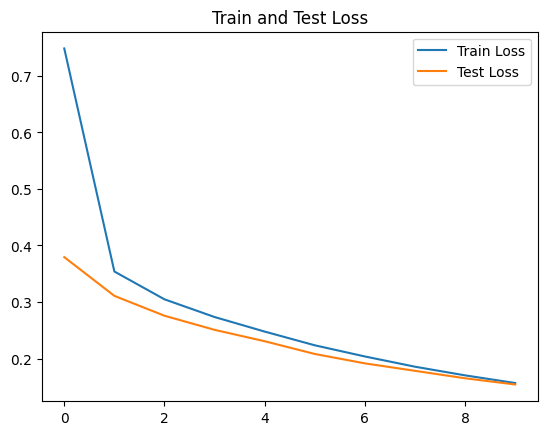

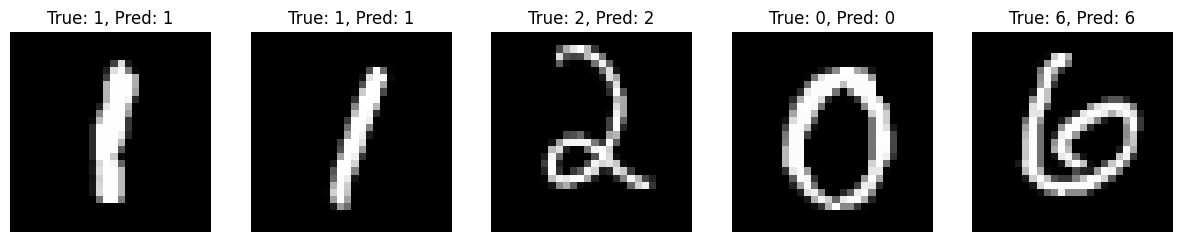

In [22]:
model = NNOneLayer()
model.start_learning(epochs=10, lr=0.0001)

### 20 епох, lr=0.0001

Epoch 1/20, Train Loss: 0.7338, Test Loss: 0.3812, Accuracy: 0.8951
Epoch 2/20, Train Loss: 0.3527, Test Loss: 0.3043, Accuracy: 0.9122
Epoch 3/20, Train Loss: 0.3014, Test Loss: 0.2726, Accuracy: 0.9221
Epoch 4/20, Train Loss: 0.2676, Test Loss: 0.2447, Accuracy: 0.9297
Epoch 5/20, Train Loss: 0.2411, Test Loss: 0.2235, Accuracy: 0.9364
Epoch 6/20, Train Loss: 0.2197, Test Loss: 0.2029, Accuracy: 0.9432
Epoch 7/20, Train Loss: 0.2007, Test Loss: 0.1914, Accuracy: 0.9456
Epoch 8/20, Train Loss: 0.1846, Test Loss: 0.1760, Accuracy: 0.9493
Epoch 9/20, Train Loss: 0.1703, Test Loss: 0.1619, Accuracy: 0.9534
Epoch 10/20, Train Loss: 0.1576, Test Loss: 0.1525, Accuracy: 0.9546
Epoch 11/20, Train Loss: 0.1466, Test Loss: 0.1445, Accuracy: 0.9588
Epoch 12/20, Train Loss: 0.1368, Test Loss: 0.1362, Accuracy: 0.9615
Epoch 13/20, Train Loss: 0.1277, Test Loss: 0.1285, Accuracy: 0.9625
Epoch 14/20, Train Loss: 0.1209, Test Loss: 0.1261, Accuracy: 0.9616
Epoch 15/20, Train Loss: 0.1132, Test Loss:

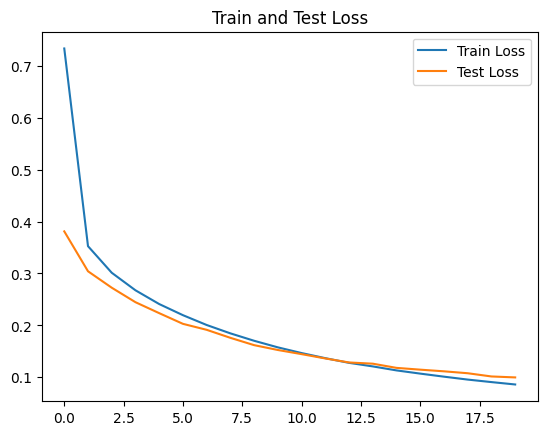

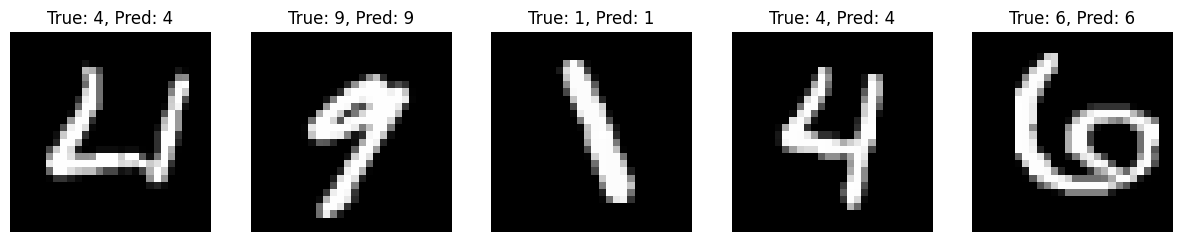

In [23]:
model = NNOneLayer()
model.start_learning(epochs=20, lr=0.0001)

### Варіант 2 (2 прихованих шари)

#### 10 епох, lr=0.001

Epoch 1/10, Train Loss: 0.3917, Test Loss: 0.2182, Accuracy: 0.9348
Epoch 2/10, Train Loss: 0.1908, Test Loss: 0.1579, Accuracy: 0.9483
Epoch 3/10, Train Loss: 0.1374, Test Loss: 0.1167, Accuracy: 0.9629
Epoch 4/10, Train Loss: 0.1095, Test Loss: 0.1011, Accuracy: 0.9693
Epoch 5/10, Train Loss: 0.0938, Test Loss: 0.0954, Accuracy: 0.9695
Epoch 6/10, Train Loss: 0.0807, Test Loss: 0.1157, Accuracy: 0.9647
Epoch 7/10, Train Loss: 0.0739, Test Loss: 0.0849, Accuracy: 0.9734
Epoch 8/10, Train Loss: 0.0648, Test Loss: 0.0944, Accuracy: 0.9720
Epoch 9/10, Train Loss: 0.0591, Test Loss: 0.0944, Accuracy: 0.9705
Epoch 10/10, Train Loss: 0.0558, Test Loss: 0.0984, Accuracy: 0.9713


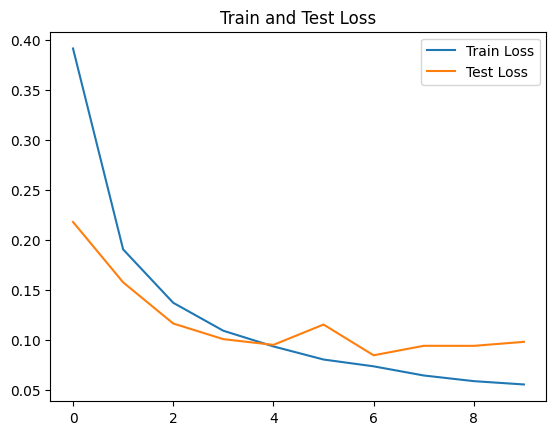

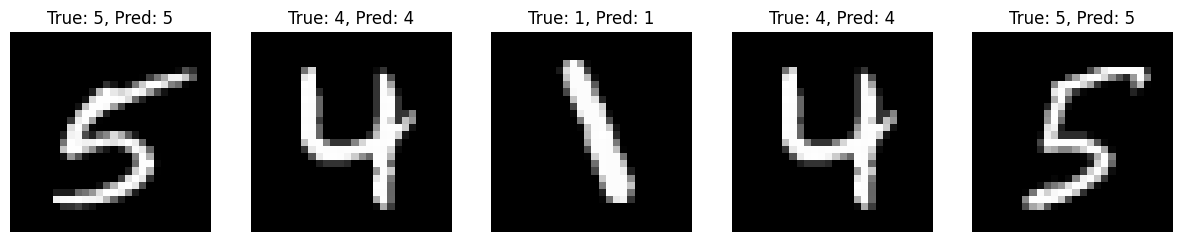

In [24]:
model = NNTwoLayers()
model.start_learning(epochs=10, lr=0.001)

#### 20 епох, lr=0.001

Epoch 1/20, Train Loss: 0.3902, Test Loss: 0.2140, Accuracy: 0.9331
Epoch 2/20, Train Loss: 0.1893, Test Loss: 0.1516, Accuracy: 0.9536
Epoch 3/20, Train Loss: 0.1384, Test Loss: 0.1175, Accuracy: 0.9654
Epoch 4/20, Train Loss: 0.1116, Test Loss: 0.1046, Accuracy: 0.9673
Epoch 5/20, Train Loss: 0.0934, Test Loss: 0.1071, Accuracy: 0.9655
Epoch 6/20, Train Loss: 0.0827, Test Loss: 0.0981, Accuracy: 0.9700
Epoch 7/20, Train Loss: 0.0739, Test Loss: 0.0991, Accuracy: 0.9690
Epoch 8/20, Train Loss: 0.0662, Test Loss: 0.0941, Accuracy: 0.9713
Epoch 9/20, Train Loss: 0.0610, Test Loss: 0.0987, Accuracy: 0.9709
Epoch 10/20, Train Loss: 0.0552, Test Loss: 0.0942, Accuracy: 0.9731
Epoch 11/20, Train Loss: 0.0489, Test Loss: 0.0924, Accuracy: 0.9733
Epoch 12/20, Train Loss: 0.0464, Test Loss: 0.0988, Accuracy: 0.9710
Epoch 13/20, Train Loss: 0.0442, Test Loss: 0.0891, Accuracy: 0.9744
Epoch 14/20, Train Loss: 0.0405, Test Loss: 0.1043, Accuracy: 0.9730
Epoch 15/20, Train Loss: 0.0395, Test Loss:

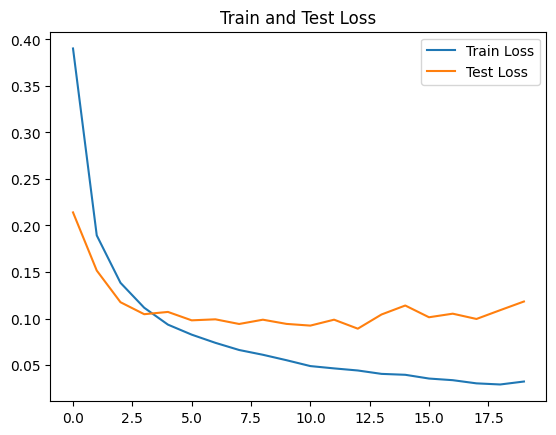

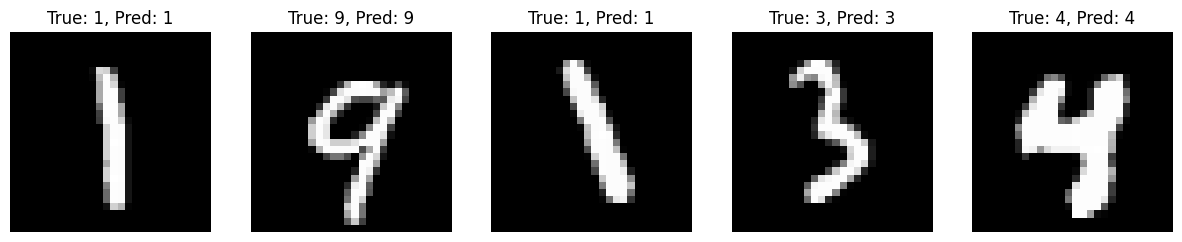

In [ ]:
model = NNTwoLayers()
model.start_learning(epochs=20, lr=0.001)

#### 10 епох, lr=0.0001

Epoch 1/10, Train Loss: 0.8053, Test Loss: 0.3696, Accuracy: 0.8970
Epoch 2/10, Train Loss: 0.3442, Test Loss: 0.2966, Accuracy: 0.9155
Epoch 3/10, Train Loss: 0.2906, Test Loss: 0.2614, Accuracy: 0.9253
Epoch 4/10, Train Loss: 0.2574, Test Loss: 0.2351, Accuracy: 0.9317
Epoch 5/10, Train Loss: 0.2325, Test Loss: 0.2201, Accuracy: 0.9356
Epoch 6/10, Train Loss: 0.2115, Test Loss: 0.1988, Accuracy: 0.9391
Epoch 7/10, Train Loss: 0.1941, Test Loss: 0.1824, Accuracy: 0.9449
Epoch 8/10, Train Loss: 0.1783, Test Loss: 0.1696, Accuracy: 0.9488
Epoch 9/10, Train Loss: 0.1649, Test Loss: 0.1591, Accuracy: 0.9522
Epoch 10/10, Train Loss: 0.1531, Test Loss: 0.1513, Accuracy: 0.9546


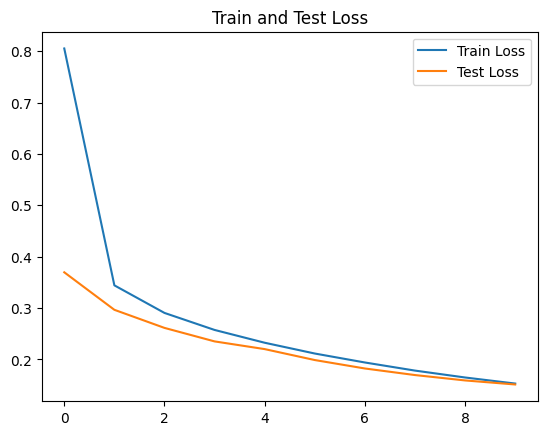

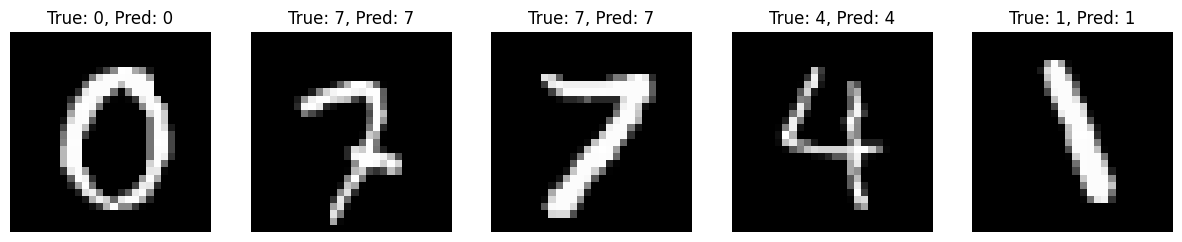

In [26]:
model = NNTwoLayers()
model.start_learning(epochs=10, lr=0.0001)

#### 20 епох, lr=0.0001

Epoch 1/20, Train Loss: 0.8074, Test Loss: 0.3697, Accuracy: 0.8981
Epoch 2/20, Train Loss: 0.3457, Test Loss: 0.2962, Accuracy: 0.9158
Epoch 3/20, Train Loss: 0.2930, Test Loss: 0.2643, Accuracy: 0.9256
Epoch 4/20, Train Loss: 0.2582, Test Loss: 0.2370, Accuracy: 0.9300
Epoch 5/20, Train Loss: 0.2329, Test Loss: 0.2168, Accuracy: 0.9365
Epoch 6/20, Train Loss: 0.2103, Test Loss: 0.2033, Accuracy: 0.9368
Epoch 7/20, Train Loss: 0.1927, Test Loss: 0.1846, Accuracy: 0.9439
Epoch 8/20, Train Loss: 0.1758, Test Loss: 0.1701, Accuracy: 0.9488
Epoch 9/20, Train Loss: 0.1623, Test Loss: 0.1649, Accuracy: 0.9516
Epoch 10/20, Train Loss: 0.1497, Test Loss: 0.1528, Accuracy: 0.9551
Epoch 11/20, Train Loss: 0.1397, Test Loss: 0.1428, Accuracy: 0.9557
Epoch 12/20, Train Loss: 0.1295, Test Loss: 0.1326, Accuracy: 0.9602
Epoch 13/20, Train Loss: 0.1210, Test Loss: 0.1276, Accuracy: 0.9614
Epoch 14/20, Train Loss: 0.1137, Test Loss: 0.1225, Accuracy: 0.9609
Epoch 15/20, Train Loss: 0.1068, Test Loss:

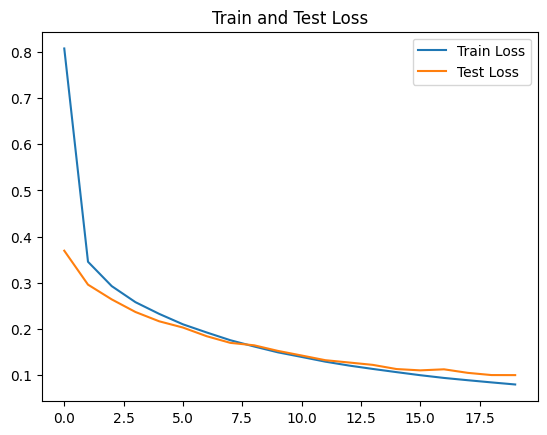

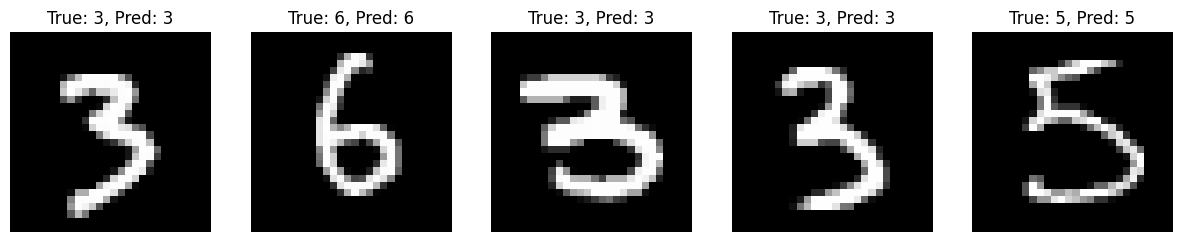

In [27]:
model = NNTwoLayers()
model.start_learning(epochs=20, lr=0.0001)